174056X - Jayasinghe U.L.N.C.


## Required libraries 

In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler ,LabelEncoder
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.decomposition import PCA
import math
from sklearn.metrics import confusion_matrix

##Loading the Dataset




In [2]:
#Loading the Dataset
bank_pdf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/banking.csv')
print(bank_pdf.shape)
print(bank_pdf.shape)

(41188, 21)
(41188, 21)


In [3]:
#Checking the Infomation about data set
bank_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

### Visulizing Categorical Data

Count Plot for Job

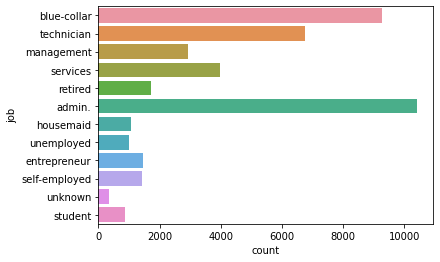

In [4]:
sns.countplot(y='job', data=bank_pdf)

Counter Plot for Marital


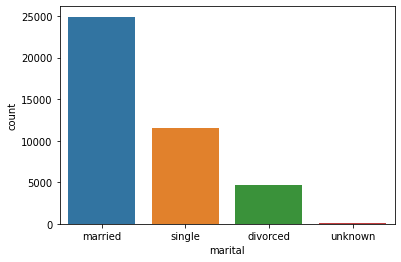

In [5]:
sns.countplot(x='marital', data=bank_pdf)

Counter Plot for Education

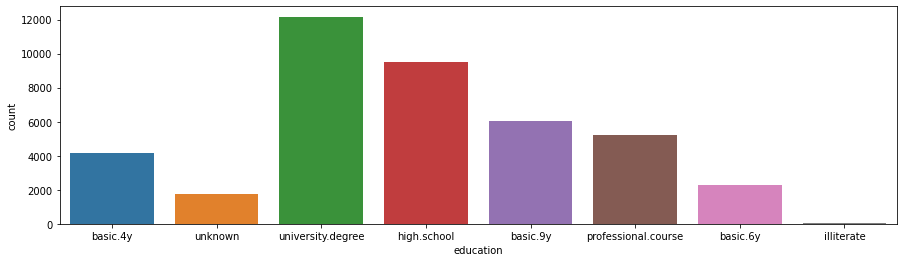

In [6]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='education', data=bank_pdf,ax=ax)

Counter Plot for Default

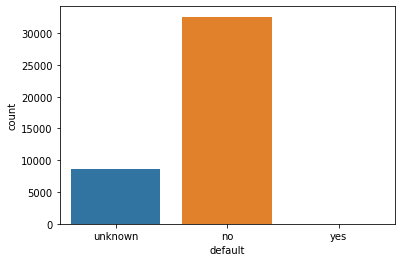

In [7]:
sns.countplot(x='default', data=bank_pdf)

Counter Plot for Housing

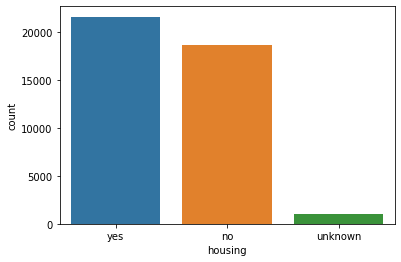

In [8]:
sns.countplot(x='housing', data=bank_pdf)

Counter Plot for Loan

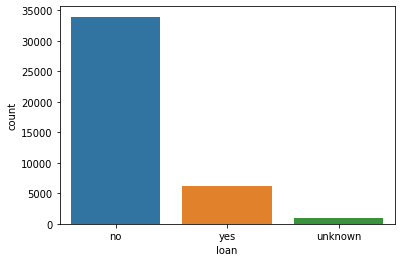

In [9]:
sns.countplot(x='loan', data=bank_pdf)

Counter Plot for  Contact

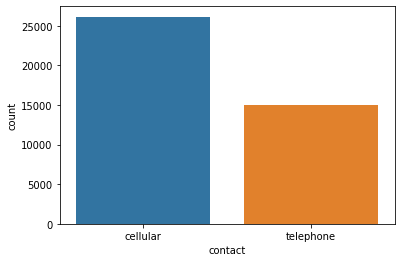

In [10]:
sns.countplot(x='contact', data=bank_pdf)

Counter Plot for Month

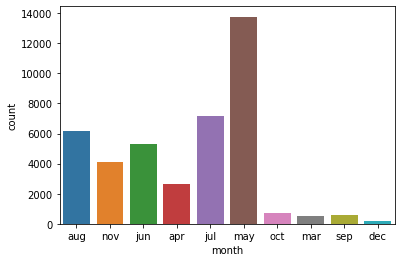

In [11]:
sns.countplot(x='month', data=bank_pdf)

Counter Plot for Day of the Week

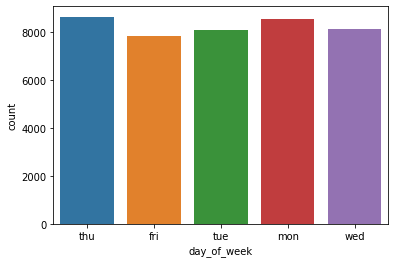

In [12]:
sns.countplot(x='day_of_week', data=bank_pdf)

Counter Plot for Poutcome

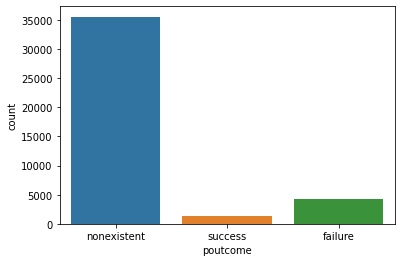

In [13]:
sns.countplot(x='poutcome', data=bank_pdf)

## Handling Duplicates & null Values

In [14]:
#Checking for the colums with NULL values
bank_pdf.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp_var_rate      False
cons_price_idx    False
cons_conf_idx     False
euribor3m         False
nr_employed       False
y                 False
dtype: bool

In [15]:
#Check the percentage of the NULL valued colums 
round(100*(bank_pdf.isnull().sum()/len(bank_pdf.index)),2)

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp_var_rate      0.0
cons_price_idx    0.0
cons_conf_idx     0.0
euribor3m         0.0
nr_employed       0.0
y                 0.0
dtype: float64

Removing null valued records

## Plot box plots for outliers detection

All box plots

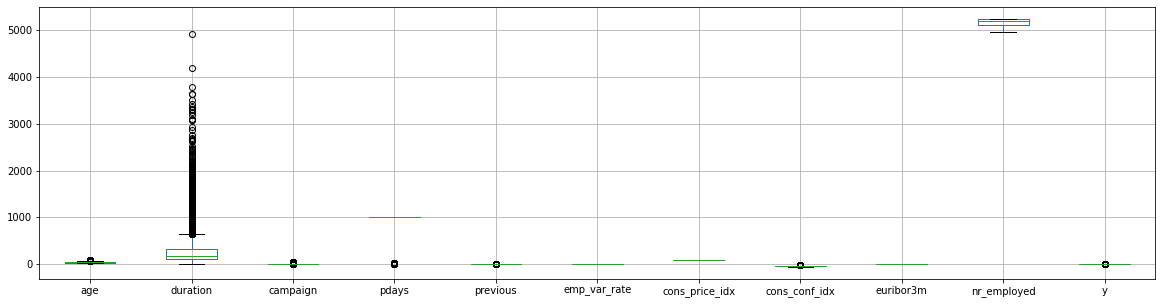

In [16]:
#Plot boxplot for outliers detection
bank_pdf.boxplot(figsize=(20,5))

Box Plot for age

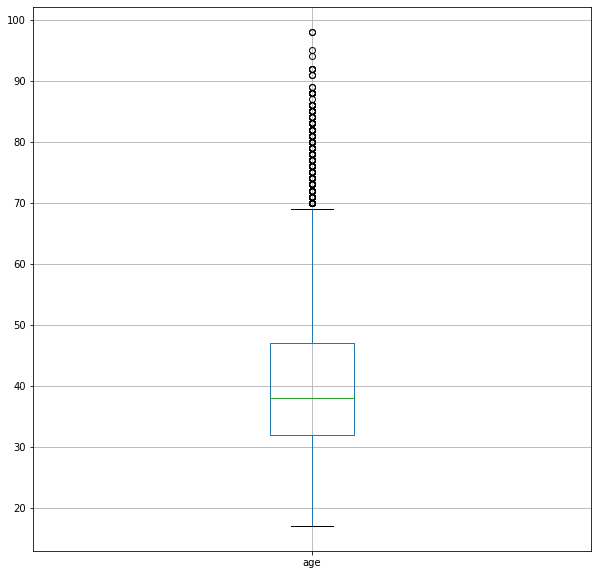

In [17]:
bank_pdf.boxplot(column=['age'],figsize=(10,10))

Box Plot for duration

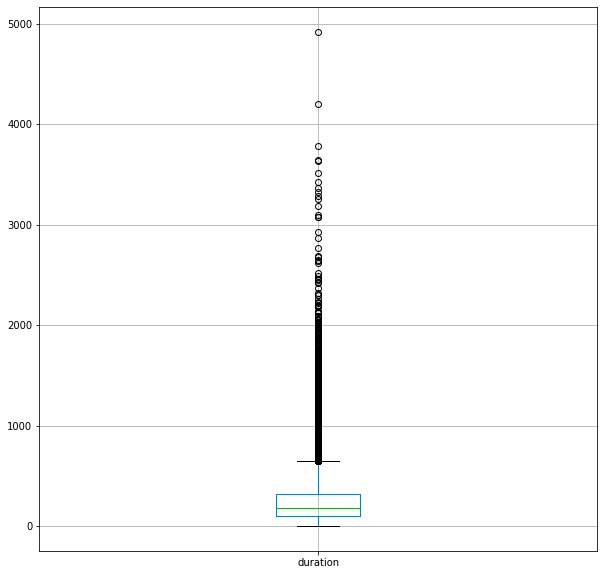

In [18]:
bank_pdf.boxplot(column=['duration'],figsize=(10,10))

Box Plot for campaign

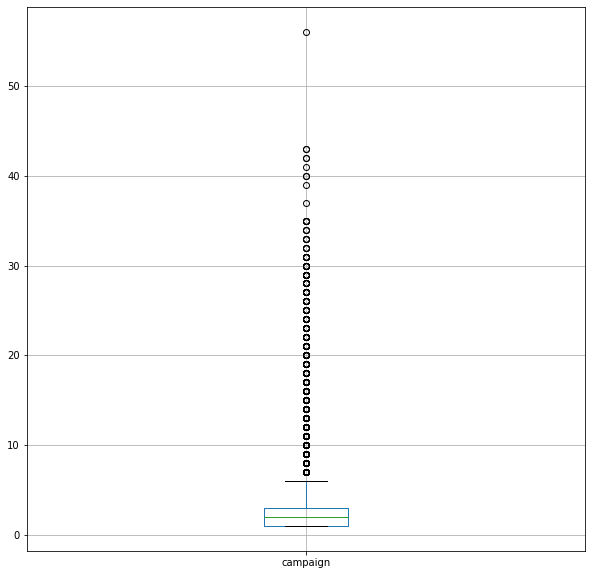

In [19]:
bank_pdf.boxplot(column=['campaign'],figsize=(10,10))

Box Plot for pdays

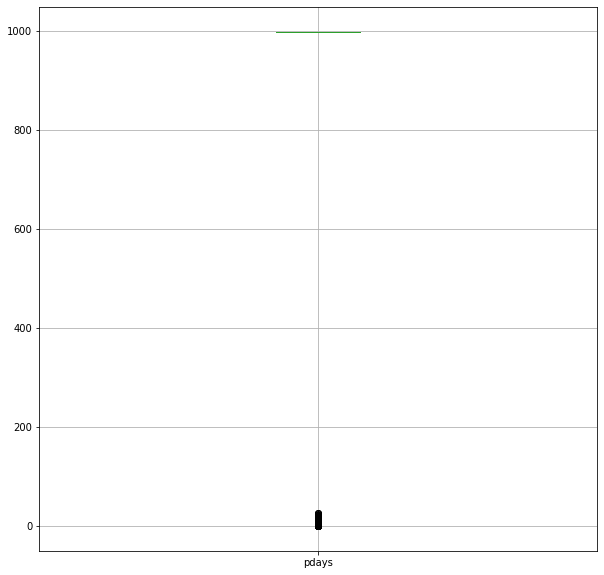

In [20]:
bank_pdf.boxplot(column=['pdays'],figsize=(10,10))

Box Plot for previous

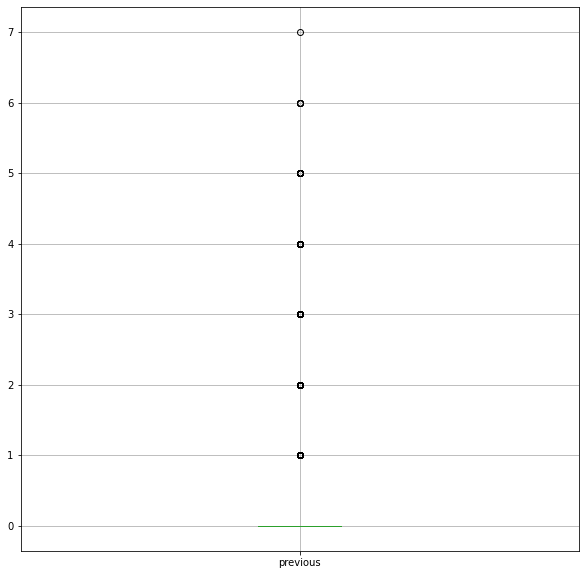

In [21]:
bank_pdf.boxplot(column=['previous'],figsize=(10,10))

*Box* Plot for emp_var_rate

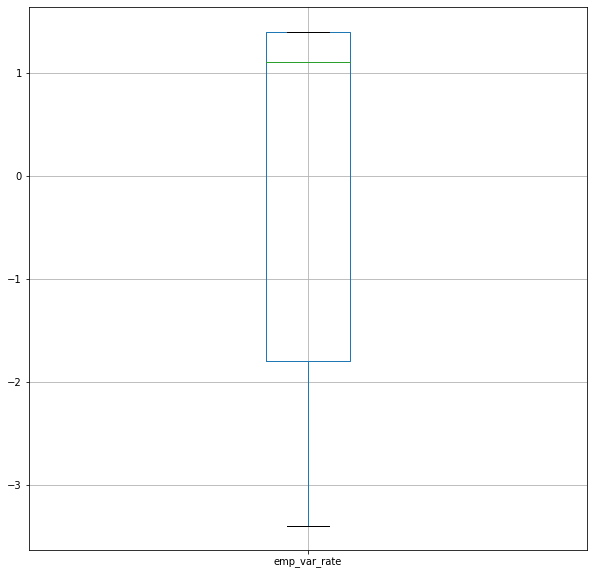

In [22]:
bank_pdf.boxplot(column=['emp_var_rate'],figsize=(10,10))

Box Plot for cons_price_idx

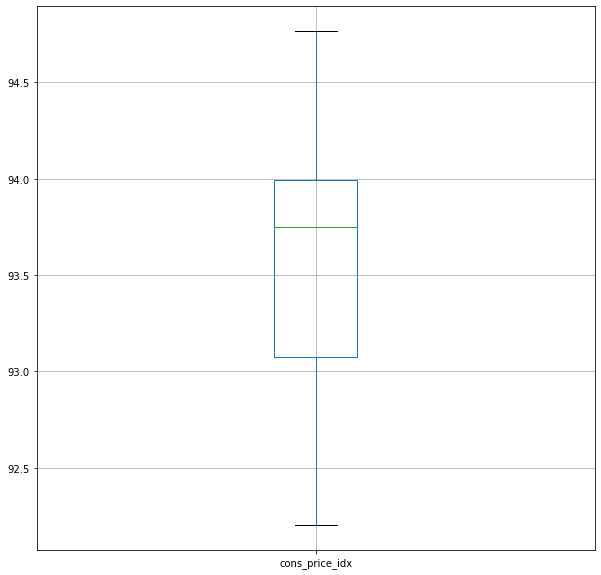

In [23]:
bank_pdf.boxplot(column=['cons_price_idx'],figsize=(10,10))

Box plot for euribor3m

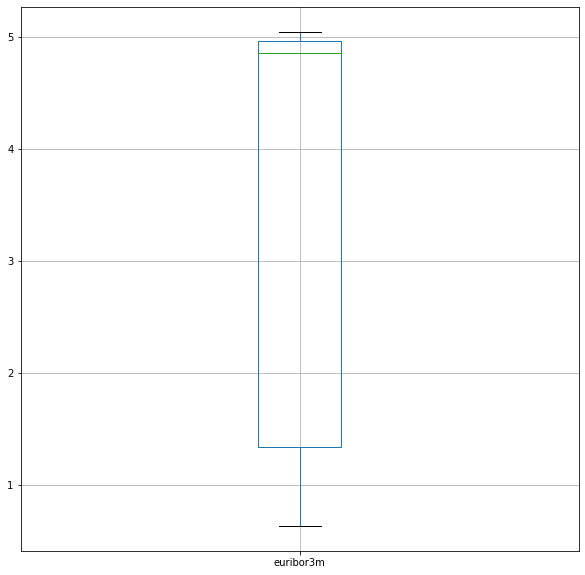

In [24]:
bank_pdf.boxplot(column=['euribor3m'],figsize=(10,10))

Box plot for nr_employed

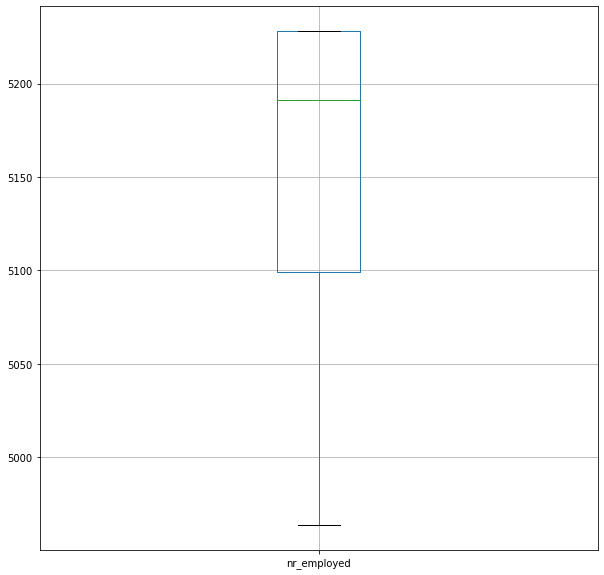

In [25]:
bank_pdf.boxplot(column=['nr_employed'],figsize=(10,10))

## Plot Q-Q plots and Histrograms


All Histrograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35b5702750>,
      dtype=object)

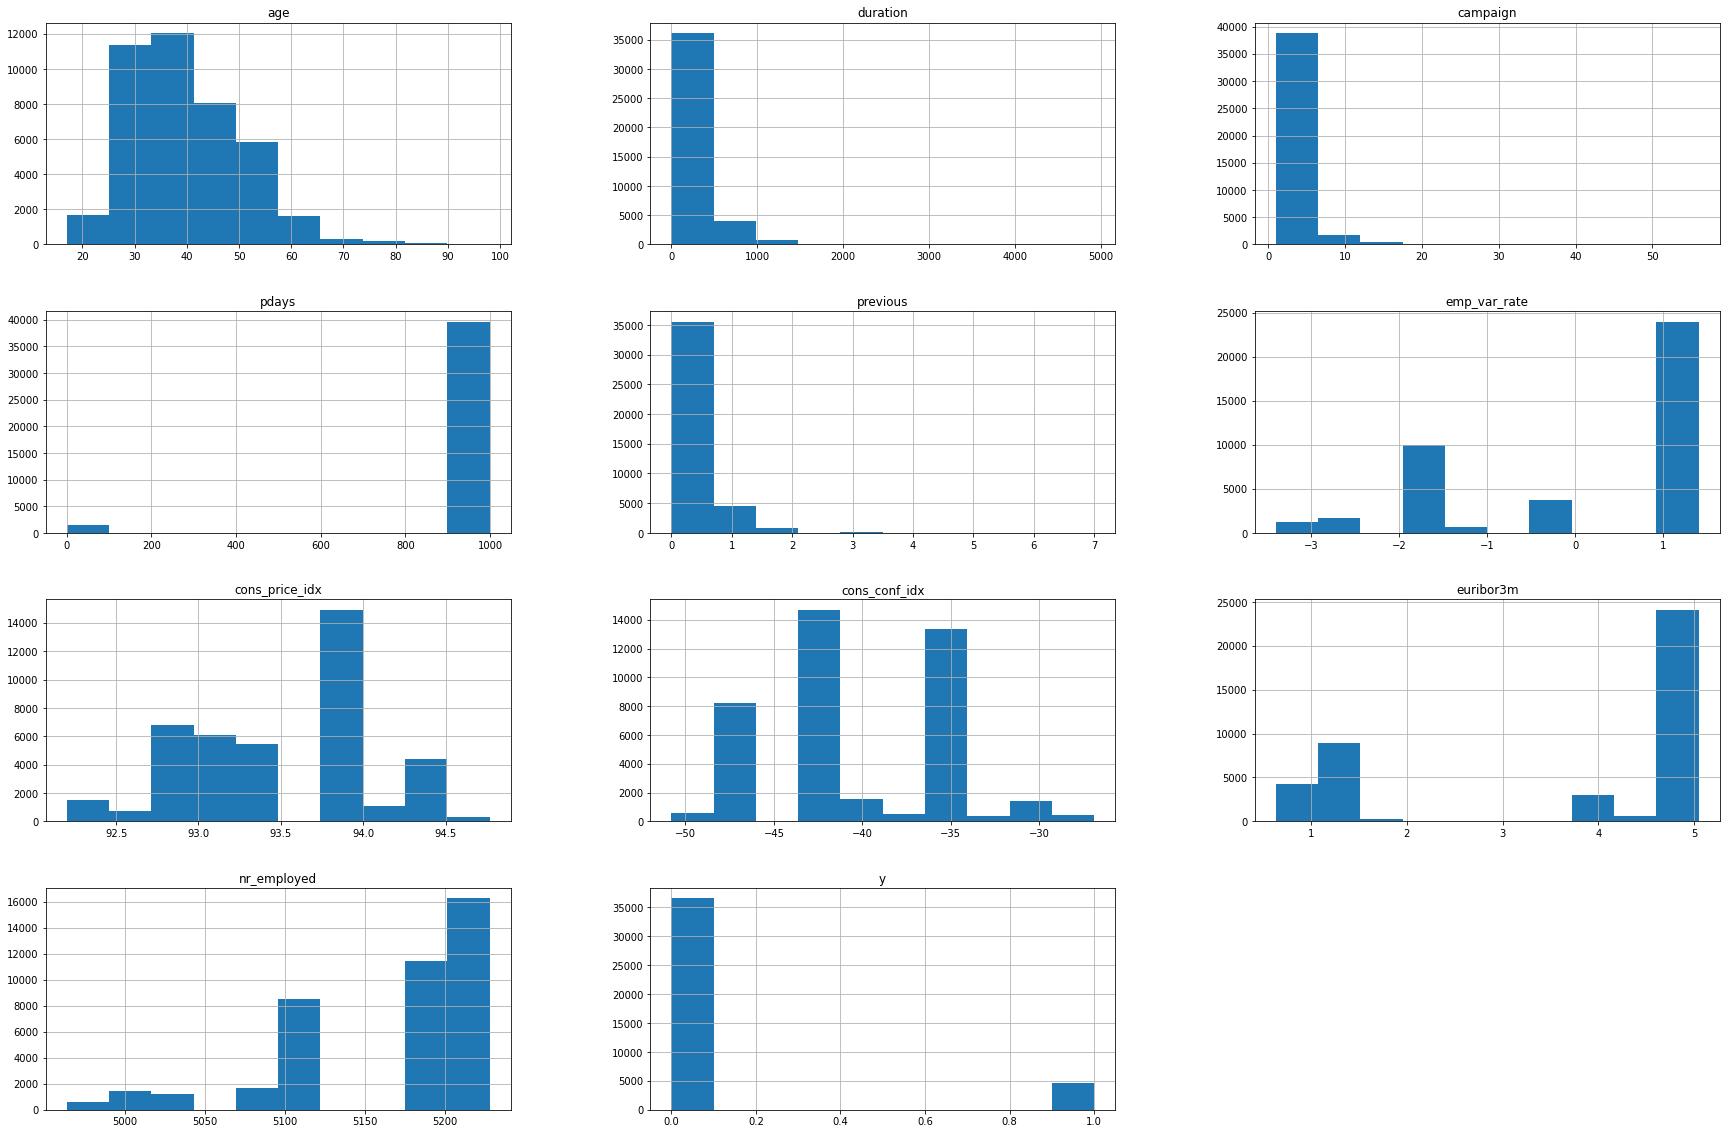

In [26]:
bank_pdf.hist(figsize=(30,20))

Q-Q plot and histrogram for age



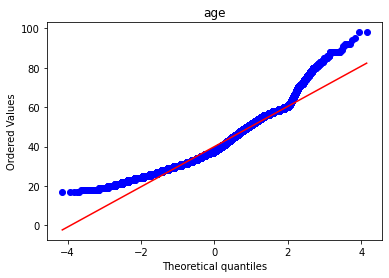

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35b508a610>]],
      dtype=object)

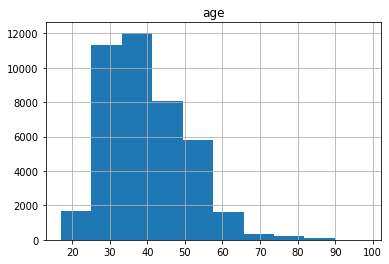

In [27]:
current_feature = "age"
stats.probplot(bank_pdf[current_feature], dist="norm", plot=plt)
plt.title(current_feature)
plt.show()

temp_pdf = pd.DataFrame(bank_pdf[current_feature],columns=[current_feature])
temp_pdf.hist()

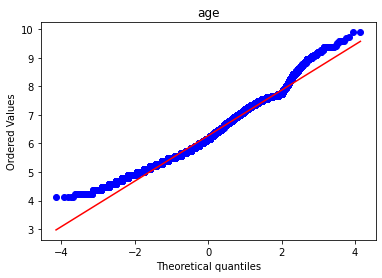

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35b3774fd0>]],
      dtype=object)

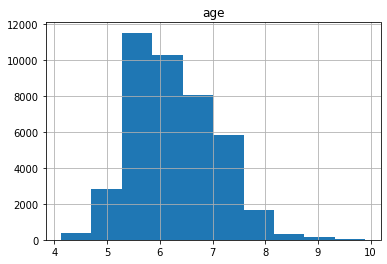

In [28]:
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
data_transformed = sqrt_transformer.transform(bank_pdf[[current_feature]])
bank_pdf[current_feature] = data_transformed

stats.probplot(bank_pdf[current_feature], dist="norm", plot=plt)
plt.title(current_feature)
plt.show()

temp_pdf = pd.DataFrame(bank_pdf[current_feature],columns=[current_feature])
temp_pdf.hist()

Q-Q plot and histrogram for duration

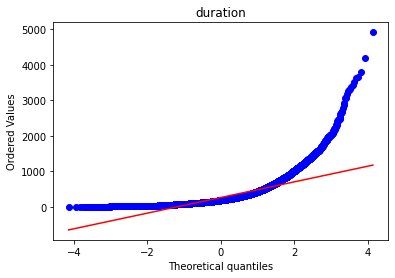

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35b3677b50>]],
      dtype=object)

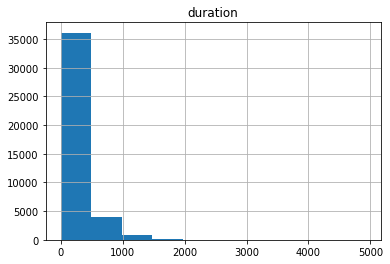

In [29]:
current_feature = "duration"
stats.probplot(bank_pdf[current_feature], dist="norm", plot=plt)
plt.title(current_feature)
plt.show()

temp_pdf = pd.DataFrame(bank_pdf[current_feature],columns=[current_feature])
temp_pdf.hist()

Apply Squre root trasnformer as duration is right skewed 

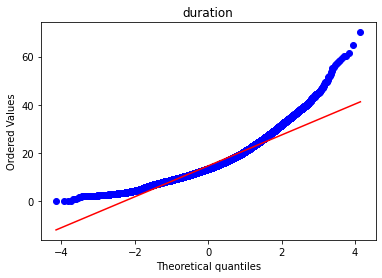

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35b3677250>]],
      dtype=object)

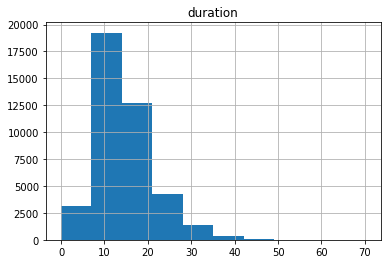

In [30]:
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
data_transformed = sqrt_transformer.transform(bank_pdf[[current_feature]])
bank_pdf[current_feature] = data_transformed

stats.probplot(bank_pdf[current_feature], dist="norm", plot=plt)
plt.title(current_feature)
plt.show()

temp_pdf = pd.DataFrame(bank_pdf[current_feature],columns=[current_feature])
temp_pdf.hist()

Q-Q plot and histrogram for campaign

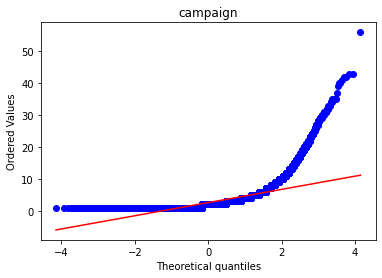

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35b3406fd0>]],
      dtype=object)

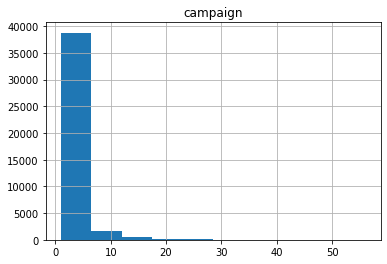

In [31]:
current_feature = "campaign"
stats.probplot(bank_pdf[current_feature], dist="norm", plot=plt)
plt.title(current_feature)
plt.show()

temp_pdf = pd.DataFrame(bank_pdf[current_feature],columns=[current_feature])
temp_pdf.hist()

Apply squre root tranfomer since campaign is right skewed

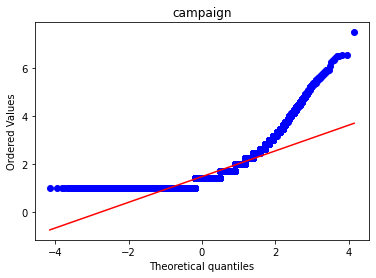

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35b3381150>]],
      dtype=object)

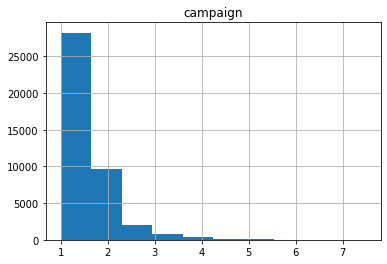

In [32]:
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
data_transformed = sqrt_transformer.transform(bank_pdf[[current_feature]])
bank_pdf[current_feature] = data_transformed

stats.probplot(bank_pdf[current_feature], dist="norm", plot=plt)
plt.title(current_feature)
plt.show()

temp_pdf = pd.DataFrame(bank_pdf[current_feature],columns=[current_feature])
temp_pdf.hist()

Q-Q plot and histrogram for pdays

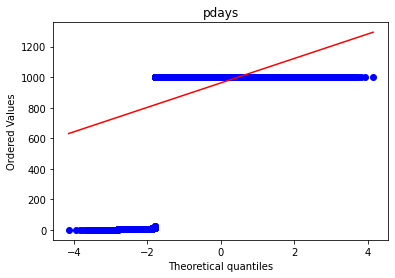

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35b325f490>]],
      dtype=object)

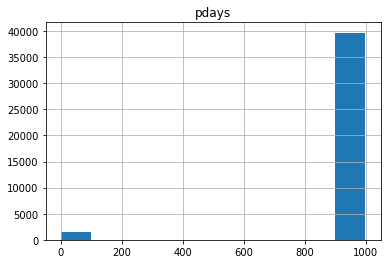

In [33]:
current_feature = "pdays"
stats.probplot(bank_pdf[current_feature], dist="norm", plot=plt)
plt.title(current_feature)
plt.show()

temp_pdf = pd.DataFrame(bank_pdf[current_feature],columns=[current_feature])
temp_pdf.hist()

Q-Q plot and histrogram for previous

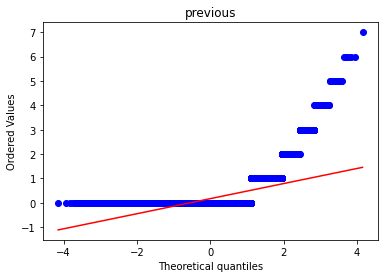

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35b3165090>]],
      dtype=object)

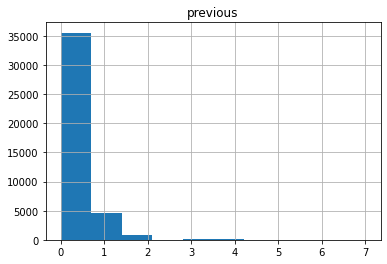

In [34]:
current_feature = "previous"
stats.probplot(bank_pdf[current_feature], dist="norm", plot=plt)
plt.title(current_feature)
plt.show()

temp_pdf = pd.DataFrame(bank_pdf[current_feature],columns=[current_feature])
temp_pdf.hist()

Q-Q plot and histrogram for emp_var_rate

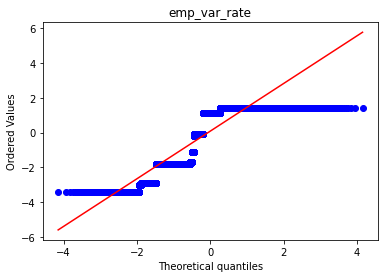

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35b305bf90>]],
      dtype=object)

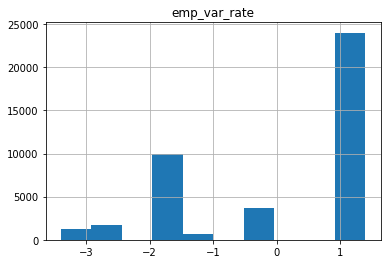

In [35]:
current_feature = "emp_var_rate"
stats.probplot(bank_pdf[current_feature], dist="norm", plot=plt)
plt.title(current_feature)
plt.show()

temp_pdf = pd.DataFrame(bank_pdf[current_feature],columns=[current_feature])
temp_pdf.hist()

Q-Q plot and histrogram for cons_price_idx



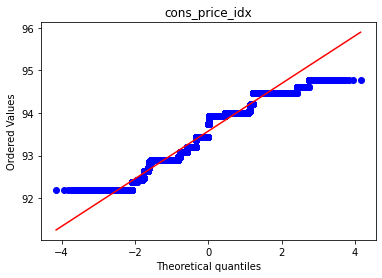

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35b31b12d0>]],
      dtype=object)

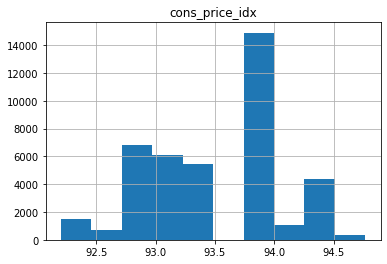

In [36]:
current_feature = "cons_price_idx"
stats.probplot(bank_pdf[current_feature], dist="norm", plot=plt)
plt.title(current_feature)
plt.show()

temp_pdf = pd.DataFrame(bank_pdf[current_feature],columns=[current_feature])
temp_pdf.hist()

Q-Q plot and histrogram for cons_conf_idx

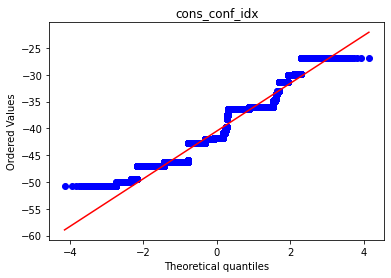

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35b34fe2d0>]],
      dtype=object)

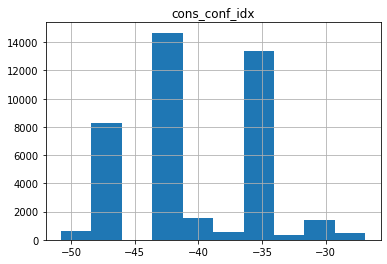

In [37]:
current_feature = "cons_conf_idx"
stats.probplot(bank_pdf[current_feature], dist="norm", plot=plt)
plt.title(current_feature)
plt.show()

temp_pdf = pd.DataFrame(bank_pdf[current_feature],columns=[current_feature])
temp_pdf.hist()

Q-Q plot and histrogram for euribor3m

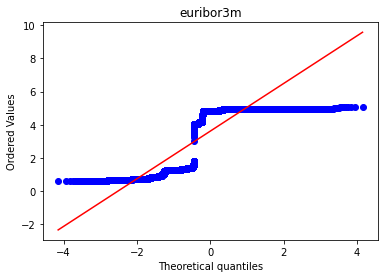

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35b36b0bd0>]],
      dtype=object)

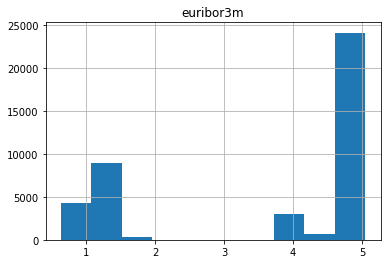

In [38]:
current_feature = "euribor3m"
stats.probplot(bank_pdf[current_feature], dist="norm", plot=plt)
plt.title(current_feature)
plt.show()

temp_pdf = pd.DataFrame(bank_pdf[current_feature],columns=[current_feature])
temp_pdf.hist()

Q-Q plot and histrogram for nr_employed

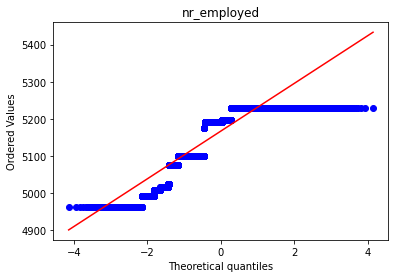

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35b359fa50>]],
      dtype=object)

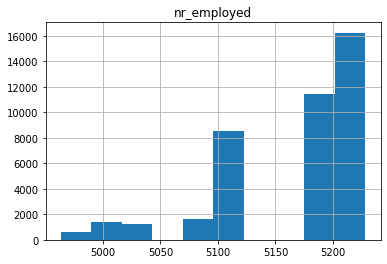

In [39]:
current_feature = "nr_employed"
stats.probplot(bank_pdf[current_feature], dist="norm", plot=plt)
plt.title(current_feature)
plt.show()

temp_pdf = pd.DataFrame(bank_pdf[current_feature],columns=[current_feature])
temp_pdf.hist()

Plot the histrogram again to see how transformation affected

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35b3016fd0>,
      dtype=object)

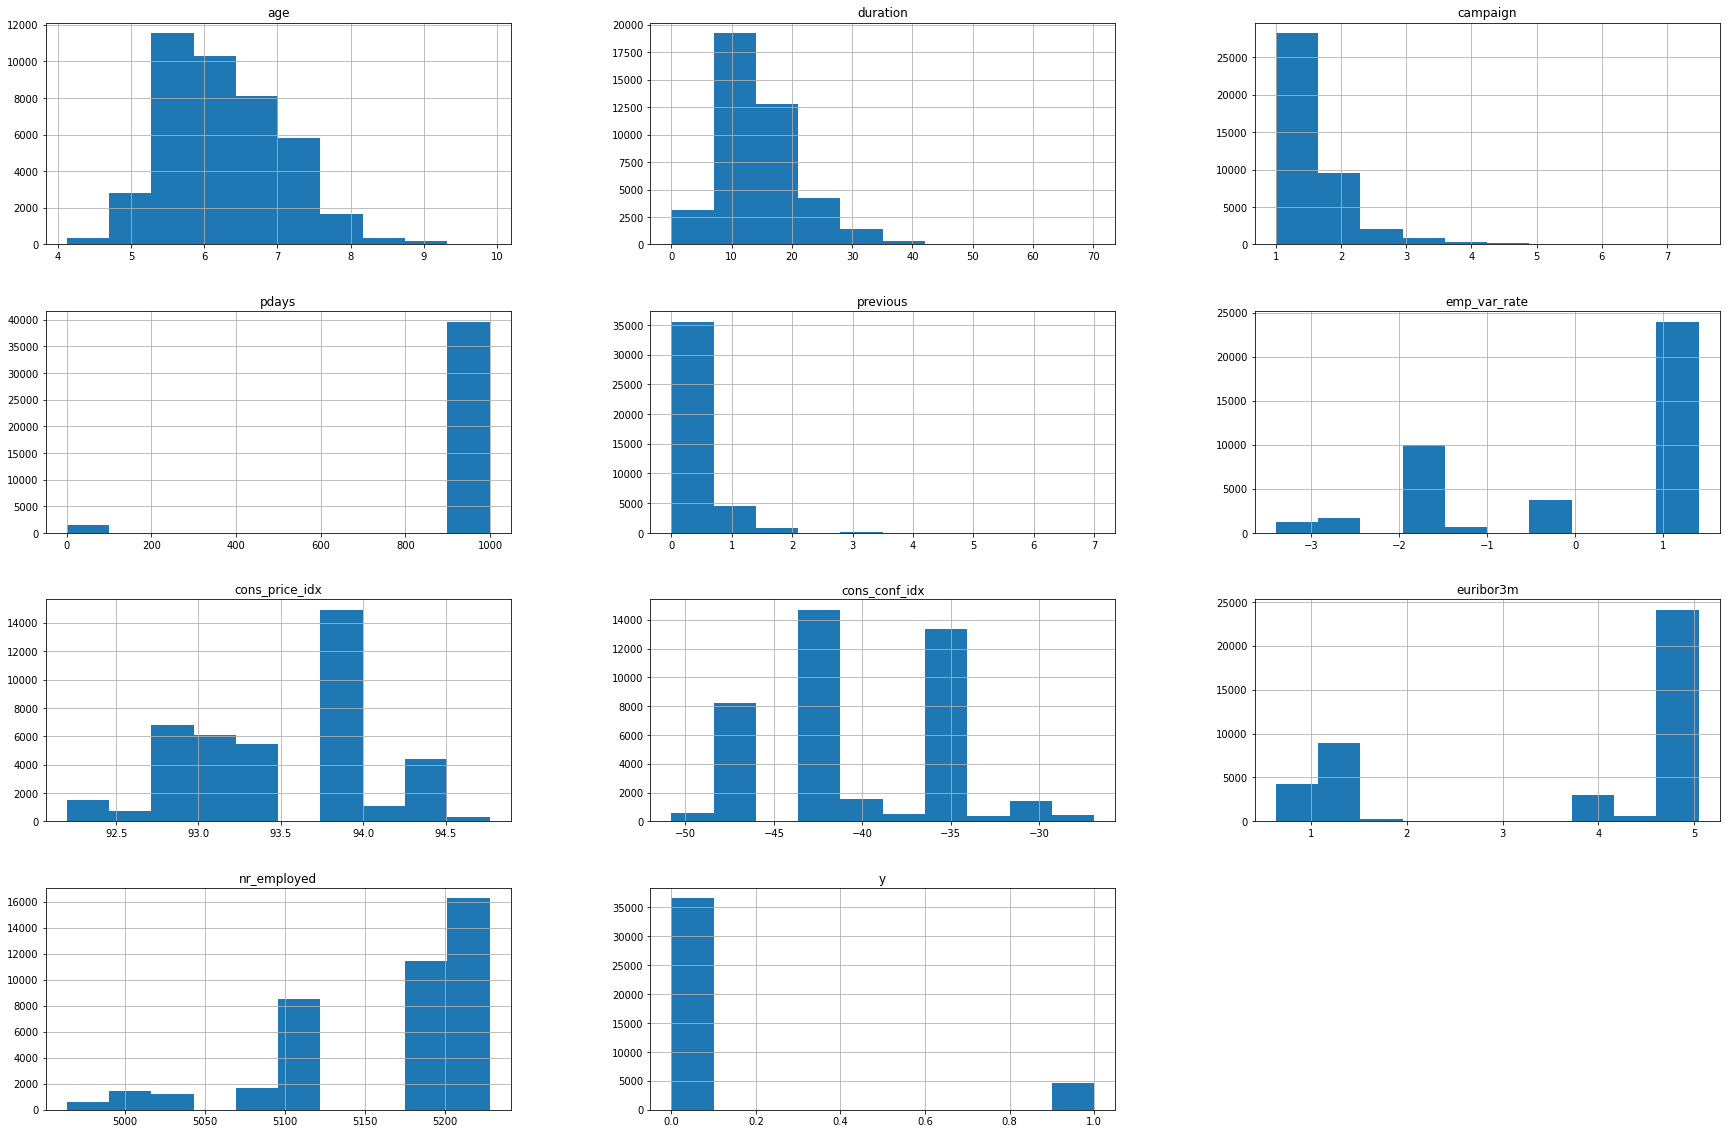

In [40]:

bank_pdf.hist(figsize=(30,20))

## Data Encoding

In [41]:
# Use label encorder
labelencoder = LabelEncoder()

bank_pdf['job']= labelencoder.fit_transform(bank_pdf['job'])
bank_pdf['marital']= labelencoder.fit_transform(bank_pdf['marital'])
bank_pdf['education']= labelencoder.fit_transform(bank_pdf['education'])
bank_pdf['default']= labelencoder.fit_transform(bank_pdf['default'])
bank_pdf['housing']= labelencoder.fit_transform(bank_pdf['housing'])
bank_pdf['loan']= labelencoder.fit_transform(bank_pdf['loan'])
bank_pdf['contact']= labelencoder.fit_transform(bank_pdf['contact'])
bank_pdf['month']= labelencoder.fit_transform(bank_pdf['month'])
bank_pdf['day_of_week']= labelencoder.fit_transform(bank_pdf['day_of_week'])
bank_pdf['poutcome']= labelencoder.fit_transform(bank_pdf['poutcome'])

print(bank_pdf.info())
bank_pdf.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  float64
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,6.633250,1,1,0,1,2,0,0,1,2,14.491377,1.000000,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,7.280110,9,1,7,0,0,0,0,7,0,11.747340,1.000000,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,5.291503,4,2,6,0,2,0,0,4,2,18.411953,1.732051,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,6.244998,7,1,3,0,0,0,0,0,0,13.601471,1.414214,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,7.416198,5,1,0,0,2,0,0,1,0,11.704700,1.000000,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1
5,5.477226,4,0,0,0,2,0,0,3,3,8.246211,2.828427,999,0,1,1.4,93.918,-42.7,4.961,5228.1,0
6,6.082763,1,1,0,0,2,0,0,6,2,14.282857,1.000000,999,0,1,-1.8,92.893,-46.2,1.327,5099.1,0
7,6.244998,1,0,2,0,2,0,0,6,0,13.820275,1.000000,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
8,6.000000,0,1,6,0,0,0,0,4,1,13.190906,1.000000,3,1,2,-2.9,92.963,-40.8,1.266,5076.2,1
9,5.196152,1,2,0,0,2,0,0,0,2,13.820275,1.414214,999,1,0,-1.8,93.075,-47.1,1.410,5099.1,0


## Data Scaling and standardizing  

In [42]:
#Reseting Index number
bank_pdf = bank_pdf.reset_index()
#Removing Categorical Features before the standardization
cat_columns= ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome',"y"]
X_Dummy = bank_pdf.drop(columns=cat_columns)
# Getting Column Names
columns_values = X_Dummy.columns
#Applying MinmaxScaller 
#step 1 - Calling the  scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_Dummy) 
X_Scaled = scaler.transform(X_Dummy)
X_Scaled_df =  pd.DataFrame(X_Scaled,columns=columns_values)
X_Scaled_Except = pd.DataFrame(bank_pdf,columns=cat_columns)
X_standard = X_Scaled_df.join(X_Scaled_Except)
X_standard.drop(['index'],axis=1,inplace=True)
X_standard.info()
X_standard

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   duration        41188 non-null  float64
 2   campaign        41188 non-null  float64
 3   pdays           41188 non-null  float64
 4   previous        41188 non-null  float64
 5   emp_var_rate    41188 non-null  float64
 6   cons_price_idx  41188 non-null  float64
 7   cons_conf_idx   41188 non-null  float64
 8   euribor3m       41188 non-null  float64
 9   nr_employed     41188 non-null  float64
 10  job             41188 non-null  int64  
 11  marital         41188 non-null  int64  
 12  education       41188 non-null  int64  
 13  default         41188 non-null  int64  
 14  housing         41188 non-null  int64  
 15  loan            41188 non-null  int64  
 16  contact         41188 non-null  int64  
 17  month           41188 non-null 

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,0.434552,0.206640,0.000000,1.000000,0.000000,1.000000,0.484412,0.615063,0.981410,1.000000,1,1,0,1,2,0,0,1,2,1,0
1,0.546536,0.167512,0.000000,1.000000,0.000000,0.687500,0.389322,0.368201,0.767853,0.877883,9,1,7,0,0,0,0,7,0,1,0
2,0.202271,0.262546,0.112913,0.006006,0.285714,0.354167,0.722525,0.460251,0.021537,0.105860,4,2,6,0,2,0,0,4,2,2,1
3,0.367339,0.193951,0.063889,1.000000,0.000000,0.333333,0.340608,0.154812,0.174790,0.512287,7,1,3,0,0,0,0,0,0,1,0
4,0.570095,0.166904,0.000000,0.003003,0.142857,0.104167,0.000000,0.811715,0.053276,0.425709,5,1,0,0,2,0,0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.615963,0.212462,0.000000,1.000000,0.000000,1.000000,0.882307,0.376569,0.959420,1.000000,5,1,3,1,0,2,1,4,2,1,0
41184,0.250097,0.199634,0.063889,1.000000,0.000000,0.937500,0.698753,0.602510,0.958059,0.859735,3,1,0,1,0,0,1,6,2,1,0
41185,0.408150,0.112280,0.112913,1.000000,0.000000,0.937500,0.698753,0.602510,0.957379,0.859735,0,2,6,1,2,2,1,6,4,1,0
41186,0.485614,0.201660,0.063889,1.000000,0.000000,0.000000,0.089634,1.000000,0.024484,0.203781,9,1,5,0,0,2,1,8,3,1,0


In [43]:
#Heat map to find relatonship between each feature
X_standard.corr()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
age,1.000000,0.000981,0.004903,-0.022688,0.012617,0.018008,0.009535,0.125390,0.030015,0.004133,-0.005631,-0.402822,-0.115341,0.172690,-0.002547,-0.007355,0.014995,-0.024581,-0.018884,0.017818,0.016280
duration,0.000981,1.000000,-0.112274,-0.065984,0.036830,-0.040965,-0.000299,0.004289,-0.045967,-0.063435,-0.005130,0.008251,-0.017429,-0.014779,-0.009818,-0.006053,-0.039136,0.006068,0.036178,0.038015,0.404378
campaign,0.004903,-0.112274,1.000000,0.058625,-0.086055,0.159956,0.130907,-0.015637,0.141771,0.152580,-0.007828,-0.009436,0.001444,0.036421,-0.011960,0.008731,0.080058,-0.066179,-0.049049,0.033983,-0.071142
pdays,-0.022688,-0.065984,0.058625,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.028468,-0.037942,-0.046626,0.080062,-0.010551,0.000345,0.117970,-0.047891,-0.009531,-0.475619,-0.324914
previous,0.012617,0.036830,-0.086055,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.020965,0.038689,0.038831,-0.102416,0.021314,-0.001327,-0.212848,0.103157,-0.004102,-0.313110,0.230181
emp_var_rate,0.018008,-0.040965,0.159956,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.008271,-0.084210,-0.043778,0.203263,-0.060196,0.001849,0.393584,-0.178782,0.033245,0.192972,-0.298334
cons_price_idx,0.009535,-0.000299,0.130907,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.016017,-0.057477,-0.081607,0.168073,-0.080504,-0.002430,0.591474,-0.004239,0.005644,0.211330,-0.136211
cons_conf_idx,0.125390,0.004289,-0.015637,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.052760,-0.033783,0.078799,0.026522,-0.033845,-0.012025,0.251614,0.009652,0.041465,0.178289,0.054878
euribor3m,0.030015,-0.045967,0.141771,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.007880,-0.091939,-0.036380,0.195336,-0.059277,0.000125,0.399773,-0.117264,0.039043,0.184144,-0.307771
nr_employed,0.004133,-0.063435,0.152580,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.019574,-0.086199,-0.041492,0.189845,-0.045862,0.003903,0.269155,-0.221425,0.028380,0.119689,-0.354678


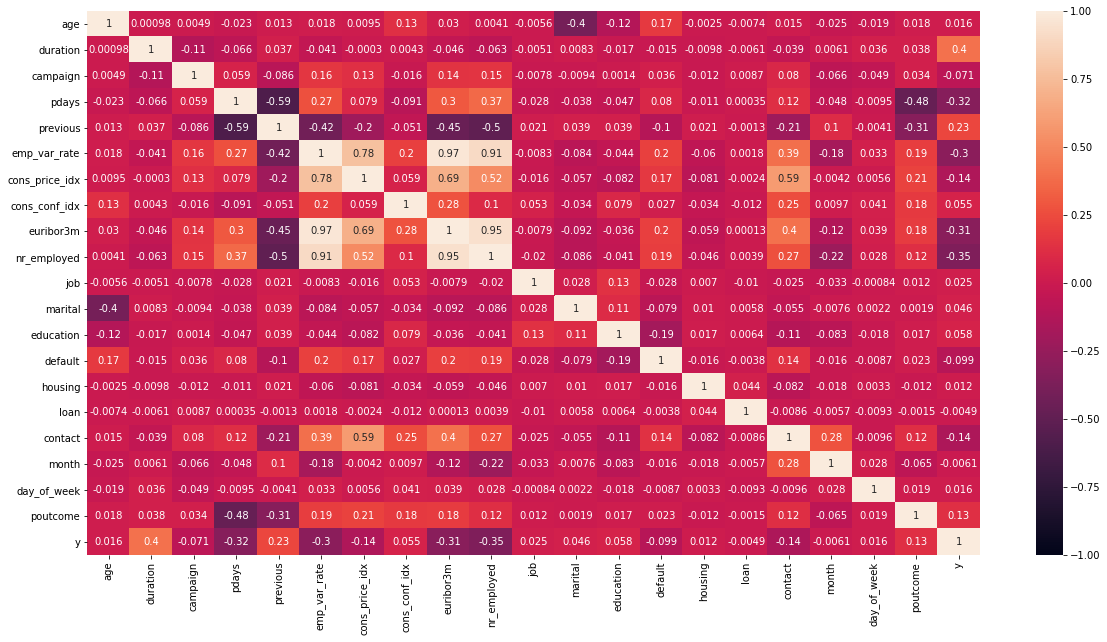

In [44]:
#Heat map to find relatonship between each feature
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(X_standard.corr(),ax=ax, vmin=-1, vmax=1,annot= True)


In [45]:
#Drop highly corelated features
X_standard=X_standard.drop(columns=["emp_var_rate"])

#Removing Independant Variable : Y
X = X_standard.drop(columns=["y"])



In [46]:
X

,age,duration,campaign,pdays,previous,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,0.434552,0.206640,0.000000,1.000000,0.000000,0.484412,0.615063,0.981410,1.000000,1,1,0,1,2,0,0,1,2,1
1,0.546536,0.167512,0.000000,1.000000,0.000000,0.389322,0.368201,0.767853,0.877883,9,1,7,0,0,0,0,7,0,1
2,0.202271,0.262546,0.112913,0.006006,0.285714,0.722525,0.460251,0.021537,0.105860,4,2,6,0,2,0,0,4,2,2
3,0.367339,0.193951,0.063889,1.000000,0.000000,0.340608,0.154812,0.174790,0.512287,7,1,3,0,0,0,0,0,0,1
4,0.570095,0.166904,0.000000,0.003003,0.142857,0.000000,0.811715,0.053276,0.425709,5,1,0,0,2,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.615963,0.212462,0.000000,1.000000,0.000000,0.882307,0.376569,0.959420,1.000000,5,1,3,1,0,2,1,4,2,1
41184,0.250097,0.199634,0.063889,1.000000,0.000000,0.698753,0.602510,0.958059,0.859735,3,1,0,1,0,0,1,6,2,1
41185,0.408150,0.112280,0.112913,1.000000,0.000000,0.698753,0.602510,0.957379,0.859735,0,2,6,1,2,2,1,6,4,1
41186,0.485614,0.201660,0.063889,1.000000,0.000000,0.089634,1.000000,0.024484,0.203781,9,1,5,0,0,2,1,8,3,1


##Appling PCA

In [47]:
X = X_standard.dropna()
pca = PCA(n_components=10)
pca.fit(X)
X_pca = pca.transform(X)

In [48]:
print(X_pca.shape)
X_before_pca = X
X=X_pca


(41188, 10)


In [49]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,-3.023275,-2.078383,4.340563,-0.024022,-0.904095,-0.393104,-0.208393,0.099769,-0.418700,0.502954
1,5.513332,1.905696,-3.432666,2.020636,1.077427,-0.258738,-0.105187,-0.340563,-0.191423,-0.073174
2,0.576946,-0.948742,-2.075162,-0.050297,-0.941316,-0.400237,1.096592,0.005257,1.341807,0.961513
3,3.338209,-3.521235,2.412044,1.937567,1.064023,-0.269215,0.417616,-0.609674,0.147665,-0.108480
4,0.958422,-1.800323,4.653031,1.982917,-0.985198,-0.413430,0.628450,-0.689409,1.506150,0.782675
...,...,...,...,...,...,...,...,...,...,...
41183,1.166957,0.170672,0.957813,0.034842,1.016865,1.752104,-0.686936,0.453367,-0.239948,0.503631
41184,-1.263513,2.868008,2.895626,0.114307,1.090839,-0.239140,-0.442969,0.426585,-0.197425,0.457383
41185,-3.497863,0.701362,-3.056162,-1.993349,-0.969771,1.619579,-0.137008,1.158298,-0.346327,0.621580
41186,5.216280,3.657786,-1.901734,-0.889046,0.925871,1.754276,0.073642,-0.410280,0.369714,0.005758


## Create training and testing vars


Using SMOTE to handle class imbalance

0    36548
1     4640
Name: y, dtype: int64


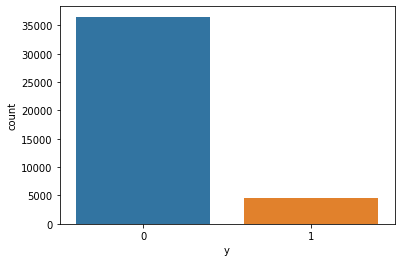

In [50]:
#checking class imbalance

y_true = X_standard['y']
print(X_standard['y'].value_counts())
sns.countplot(x='y', data=X_standard)
plt.show()

In [51]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
os = SMOTE(random_state=0)


X_class_train, x_test, y_class_train, y_test = train_test_split(X,y_true, test_size=0.2, random_state=0)

data_X, data_y = os.fit_sample(X_class_train, y_class_train)
smoted_X = pd.DataFrame(data=data_X )
smoted_y= pd.DataFrame(data=data_y,columns=['y'])



/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


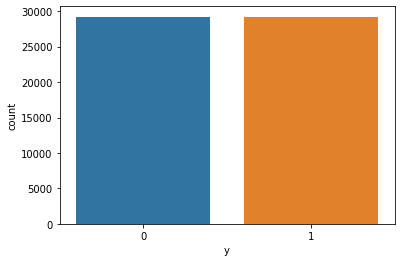

In [52]:
sns.countplot(x='y', data=smoted_y)
plt.show()



In [53]:
x_train = smoted_X
y_train = smoted_y
print("Traing Data Shape",x_train.shape, y_train.shape)
print("Testing Data Shape",x_test.shape, y_test.shape)

Traing Data Shape (58446, 10) (58446, 1)
Testing Data Shape (8238, 10) (8238,)


##Implementing SVM

### SVM and ROC related libaries 

In [54]:
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

### Linear Kernel

Testing AUC on Test data

In [55]:
model =SVC(kernel="linear" ,C = 1,gamma='auto')
clf = CalibratedClassifierCV(model, cv=3)
clf.fit(x_train,y_train.values.ravel())
pred_test = clf.predict_proba(x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train)

Plot ROC curve

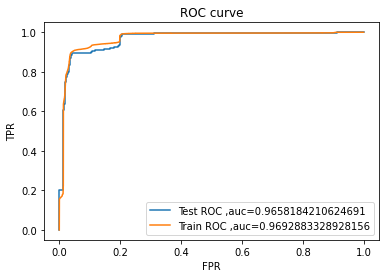

In [56]:
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

AUC values

In [57]:
print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

AUC on Test data is 0.9658184210624691
AUC on Train data is 0.9692883328928156


Drawing  heatmaps

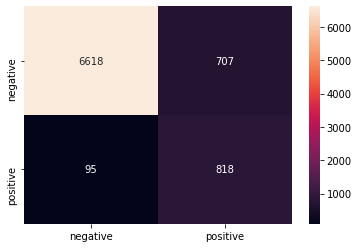

In [58]:
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure()
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

Final Evalution of Sigmoid Kernel

In [59]:
print(classification_report(y_test, pred_test.round()))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      7325
           1       0.54      0.90      0.67       913

    accuracy                           0.90      8238
   macro avg       0.76      0.90      0.81      8238
weighted avg       0.94      0.90      0.91      8238



### **Polynomial Kernel**

Testing AUC on Test data

In [60]:
model =SVC(kernel="poly" ,C=5,degree =3,gamma='auto')
clf = CalibratedClassifierCV(model, cv=3)
clf.fit(x_train,y_train.values.ravel())
pred_test = clf.predict_proba(x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train)


Plot ROC curve

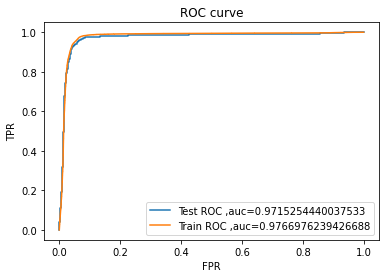

In [61]:
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

AUC values

In [62]:
print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

AUC on Test data is 0.9715254440037533
AUC on Train data is 0.9766976239426688


Drawing  heatmaps

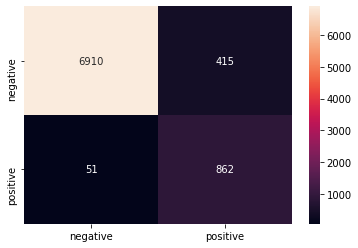

In [63]:
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names)
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

Final Evalution of Polynomial Kernel

In [64]:
print(classification_report(y_test, pred_test.round()))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97      7325
           1       0.68      0.94      0.79       913

    accuracy                           0.94      8238
   macro avg       0.83      0.94      0.88      8238
weighted avg       0.96      0.94      0.95      8238



### Gaussian Kernel

Testing AUC on Test data

In [65]:
model =SVC(kernel="rbf" ,C = 2,gamma='auto')
clf = CalibratedClassifierCV(model, cv=3)
clf.fit(x_train,y_train.values.ravel())
pred_test = clf.predict_proba(x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train)

Plot ROC curve

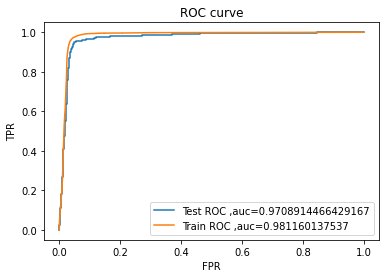

In [66]:
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

AUC values

In [67]:
print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

AUC on Test data is 0.9708914466429167
AUC on Train data is 0.981160137537


Drawing  heatmaps

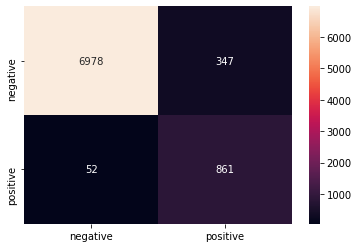

In [68]:
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

Final Evalution of Gaussian Kernel

In [69]:
print(classification_report(y_test, pred_test.round()))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      7325
           1       0.71      0.94      0.81       913

    accuracy                           0.95      8238
   macro avg       0.85      0.95      0.89      8238
weighted avg       0.96      0.95      0.95      8238



### Sigmoid Kernel

Testing AUC on Test data

In [70]:
model =SVC(kernel="sigmoid" ,C = 1,gamma='auto')
clf = CalibratedClassifierCV(model, cv=3)
clf.fit(x_train,y_train.values.ravel())
pred_test = clf.predict_proba(x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train)

Plot ROC curve

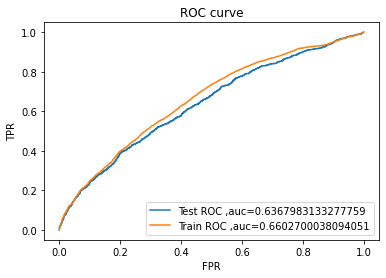

In [71]:
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

AUC values

In [72]:
print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

AUC on Test data is 0.6367983133277759
AUC on Train data is 0.6602700038094051


Drawing  heatmaps

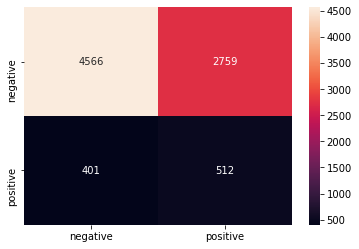

In [73]:
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure()
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

Final Evalution of Sigmoid Kernel

In [74]:
print(classification_report(y_test, pred_test.round()))

              precision    recall  f1-score   support

           0       0.92      0.62      0.74      7325
           1       0.16      0.56      0.24       913

    accuracy                           0.62      8238
   macro avg       0.54      0.59      0.49      8238
weighted avg       0.83      0.62      0.69      8238

